## RATING COMPARISON OF CHOCOLATE ACCORDING TO PROVENANCE

### Author: Mansi Chauhan

**Email: mxchauhan@yahoo.com**

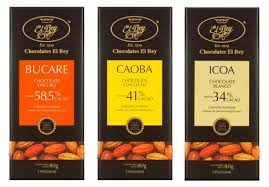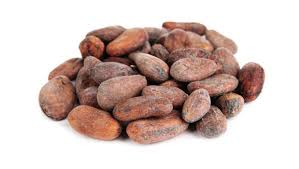

This dataset shows the ratings of 1,795 chocolate bars.  Along with the ratings of each bar, the dataset includes the type of bean used to make the chocolate, the origin, the cocoa percentage , the bar name, as well as the location of company.  The ratings range from 1-5, 1 being unpleasant to 5 being elite.  Each chocolate in the dataset only represents one bar from one batch.

In this analysis, we will explore the relationship between the variables, such as comparison of cocoa percentage and ratings, and also determine what characteristics of a chocolate bar contribute to a higher mean rating.

Data Source: https://www.kaggle.com/rtatman/chocolate-bar-ratings

## Importing and Cleaning Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving flavors_of_cacao.csv to flavors_of_cacao.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We rename the columns to make them easier to work with. 

In [0]:
chocolate = pd.read_csv("flavors_of_cacao.csv")
chocolate.rename(columns = {'Company\xa0\n(Maker-if known)': 'company',
                            'Specific Bean Origin\nor Bar Name':'originOrBarName', 
                            'Cocoa\nPercent': 'cocoaPercent',
                            'Company\nLocation': 'companyLocation',
                            'Rating': 'rating',
                            'Bean\nType':'beanType',
                            'Broad Bean\nOrigin': 'broadOrigin'}, inplace=True)
chocolate.rating = chocolate.rating.astype(float)
chocolate.drop('REF', axis=1, inplace=True)
chocolate.drop('Review\nDate', axis=1, inplace=True)

A list of the types of cocoa beans in the dataset.

In [7]:
chocolate.beanType.unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

We replace the space character  `\xa0 `  ([non-breaking space](https://stackoverflow.com/a/11566398/45963)) with ` None`.

In [5]:
chocolate.loc[chocolate.beanType == '\xa0', 'beanType'] = None
chocolate.beanType
chocolate.beanType.isnull().sum()

888

The data has 1795 rows and 7 columns.

In [6]:
chocolate.shape

(1795, 7)

Below is a snapshot of the dataframe once data importing and cleaning is completed.

In [8]:
chocolate.head(10)

,company,originOrBarName,cocoaPercent,companyLocation,rating,beanType,broadOrigin
0,A. Morin,Agua Grande,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,None,Togo
2,A. Morin,Atsane,70%,France,3.00,None,Togo
3,A. Morin,Akata,70%,France,3.50,None,Togo
4,A. Morin,Quilla,70%,France,3.50,None,Peru
5,A. Morin,Carenero,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,70%,France,3.50,None,Cuba
7,A. Morin,Sur del Lago,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,70%,France,4.00,None,Peru


## Chocolate Ratings Distribution



A box plot shows rating of both 1.0 and 5.0 to be outliers in the dataset.


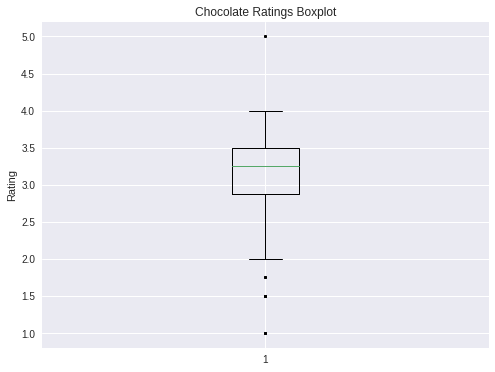

In [9]:
x = chocolate.rating
plt.figure(figsize = (8, 6))
plt.ylabel('Rating')
plt.title('Chocolate Ratings Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

A histogram provides another view of the distribution of ratings in the data. We appreciate the distribution to have [negative skew](https://en.wikipedia.org/wiki/Skewness#Introduction), meaning that a randomly sampled chocolate bar is more likely to get a rating above the mean of 3.19.  

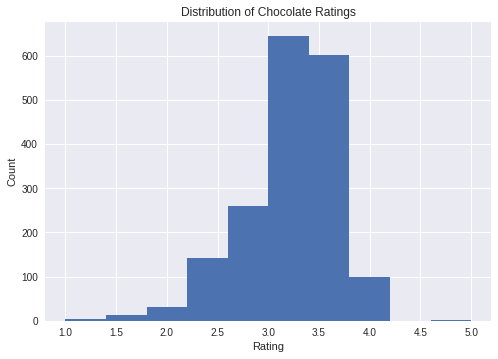

In [10]:
plt.hist(x)
plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Distribution of Chocolate Ratings')
plt.show()

The ratings have a standard deviation  of 0.48 and a median value of 3.25. Raters seem to be generous or the chocolate quality in the dataset is high!

In [11]:
chocolate.rating.describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rating, dtype: float64

## Cocoa Content Comparison

The plot below shows the unique values of cocoa percentage in the data.

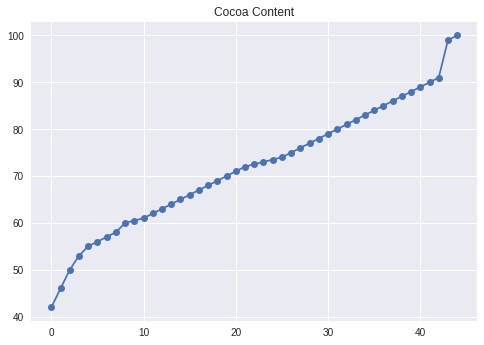

In [39]:
chocolate.cocoaPercent = chocolate.cocoaPercent.astype(str)
chocolate.cocoaPercent = chocolate.cocoaPercent.apply(lambda chocolate: chocolate.strip('%'))
chocolate.cocoaPercent = chocolate.cocoaPercent.astype(float)
sortedCocoaContent = np.sort(chocolate.cocoaPercent.unique())
plt.plot(sortedCocoaContent, marker='o')
plt.title('Cocoa Content')
plt.show()


When comparing cocoa percent and rating we cannot find a clear correlation between the two variables.

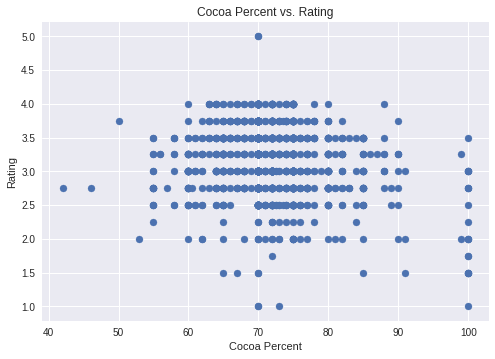

In [14]:
plt.scatter(y=chocolate.rating, x=chocolate.cocoaPercent)
plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')
plt.title('Cocoa Percent vs. Rating')
plt.show()

Despite that the scatterplot does not show a clear correlation between cocoa percent and the ratings, a relationship between the two variables is possible.  In the plot below, we compare the cocoa percentage to the mean rating.

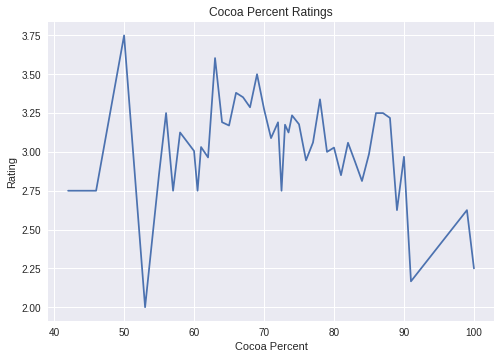

In [15]:
cocoaPercentRating = chocolate.groupby(['cocoaPercent']).mean()
plt.plot(cocoaPercentRating.rating)
plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')
plt.title('Cocoa Percent Ratings')
plt.show()

In the plot above, we see extreme values for a cocoa percentage of about 43 and 52.  This may be due to the lack of data for those specific percentages.  Thus, we put the cocoa percentages into bins.

In [0]:
def assignCocoaRange (row):
  if row['cocoaPercent'] < 46.:
    return 40
  elif row['cocoaPercent'] > 45. and row['cocoaPercent'] < 56.:
    return 50
  elif row['cocoaPercent'] > 55. and row['cocoaPercent'] < 66.:
    return 60
  elif row['cocoaPercent'] > 65. and row['cocoaPercent'] < 76.:
    return 70
  elif row['cocoaPercent'] > 75. and row['cocoaPercent'] < 86.:
    return 80
  elif row['cocoaPercent'] > 85. and row['cocoaPercent'] < 96.:
    return 90
  else:
    return 100

In [18]:
chocolate['cocoaRange'] = chocolate.apply(lambda chocolate: assignCocoaRange(chocolate), axis=1)
chocolate.head(10)

,company,originOrBarName,cocoaPercent,companyLocation,rating,beanType,broadOrigin,cocoaRange
0,A. Morin,Agua Grande,63.0,France,3.75,None,Sao Tome,60
1,A. Morin,Kpime,70.0,France,2.75,None,Togo,70
2,A. Morin,Atsane,70.0,France,3.00,None,Togo,70
3,A. Morin,Akata,70.0,France,3.50,None,Togo,70
4,A. Morin,Quilla,70.0,France,3.50,None,Peru,70
5,A. Morin,Carenero,70.0,France,2.75,Criollo,Venezuela,70
6,A. Morin,Cuba,70.0,France,3.50,None,Cuba,70
7,A. Morin,Sur del Lago,70.0,France,3.50,Criollo,Venezuela,70
8,A. Morin,Puerto Cabello,70.0,France,3.75,Criollo,Venezuela,70
9,A. Morin,Pablino,70.0,France,4.00,None,Peru,70


In [20]:
chocolate['meanRating'] = chocolate['cocoaRange'].map(cocoaRangeRating['meanRating'])
chocolate.head(5)

,company,originOrBarName,cocoaPercent,companyLocation,rating,beanType,broadOrigin,cocoaRange,meanRating
0,A. Morin,Agua Grande,63.0,France,3.75,None,Sao Tome,60,3.139303
1,A. Morin,Kpime,70.0,France,2.75,None,Togo,70,3.241838
2,A. Morin,Atsane,70.0,France,3.00,None,Togo,70,3.241838
3,A. Morin,Akata,70.0,France,3.50,None,Togo,70,3.241838
4,A. Morin,Quilla,70.0,France,3.50,None,Peru,70,3.241838


Plotting the cocoa percentage (ranges) aganist the mean rating, we find that cocoa content of about 70 percent has the highest mean rating.

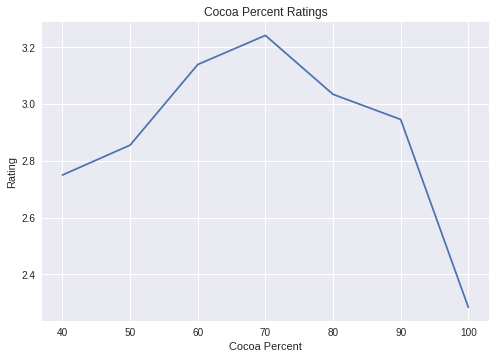

In [19]:
cocoaRangeRating = chocolate.groupby(['cocoaRange']).mean()
cocoaRangeRating.rename(columns = {'rating' : 'meanRating'}, inplace=True)
plt.plot(cocoaRangeRating.meanRating)
plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')
plt.title('Cocoa Percent Ratings')
plt.show()

### Two Tailed T-test



In the two-sided t-test below we are comparing the mean ratings of two samples.  One sample comes from the set of chocolate bars which have 70 percent content of cocoa.  The second sample comes form the set of chocolate bars with a different cocoa content.  The test measures whether the mean value differs significantly across the samples.
The two-sided t-test gives us a t-value of -3.43 and a p-value of 0.0008.  This tells us the chocolates with a 70 percent cocoa content is significantly different from those with a different cocoa content with over a 99 percent confidence.

In [58]:
cocoaRange70 = chocolate.loc[lambda chocolate: chocolate.cocoaRange == 70, :]
cocoaRangeNot70 = chocolate.loc[lambda chocolate: chocolate.cocoaRange != 70, :]

np.random.seed(0)
sample1 = np.random.choice(cocoaRange70.rating, 100, replace = True)
sample2 = np.random.choice(cocoaRangeNot70.rating, 100, replace = True)

print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=-3.428472087477016, pvalue=0.0007523647823387659)


In [56]:
print(np.mean(sample1))
print(np.mean(sample2))

3.22
2.985


## Bean Comparison

The plot below shows the different types of beans and their frequencies.  The bean types with the highest frequency are Trinitario, Criollo, and Forastero.

In [25]:
beanCounts = chocolate.beanType.value_counts()
other = beanCounts[10:].sum()
beanCounts = beanCounts[:10]
beanCounts.loc[11] = other
beanCounts.rename(index = {11:'Other'}, inplace=True)
beanCounts

Trinitario               419
Criollo                  153
Forastero                 87
Forastero (Nacional)      52
Blend                     41
Criollo, Trinitario       39
Forastero (Arriba)        37
Criollo (Porcelana)       10
Trinitario, Criollo        9
Forastero (Parazinho)      8
Other                     52
Name: beanType, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


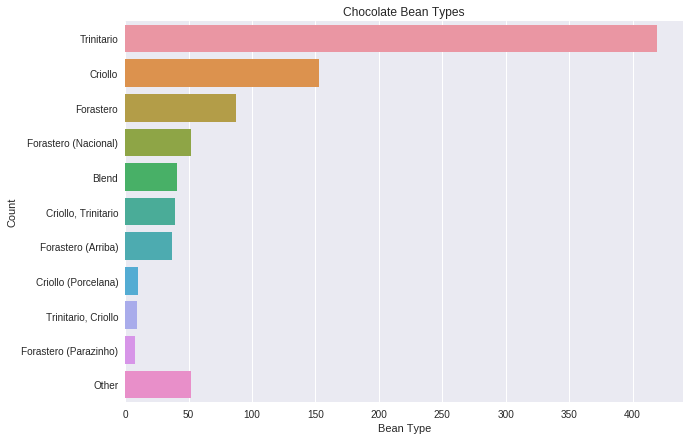

In [26]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.barplot(y=beanCounts.index, x=beanCounts.values)
plt.title('Chocolate Bean Types')
plt.ylabel('Count')
plt.xlabel('Bean Type')
plt.show()

However, we would like to see which are the top beans according to mean rating.

In [27]:
bestBeans = chocolate.groupby(['beanType']).mean().sort_values('rating', ascending=False)
bestBeans.head(10)

,cocoaPercent,rating,cocoaRange,meanRating
beanType,,,,
Criollo (Ocumare 67),70.0,4.000,70.0,3.241838
Criollo (Wild),68.0,4.000,70.0,3.241838
Trinitario (85% Criollo),70.0,3.875,70.0,3.241838
Forastero (Amelonado),70.0,3.750,70.0,3.241838
"Trinitario, Nacional",70.0,3.750,70.0,3.241838
Amazon mix,74.0,3.750,70.0,3.241838
Criollo (Ocumare 77),70.0,3.750,70.0,3.241838
"Trinitario, TCGA",72.0,3.750,70.0,3.241838
"Blend-Forastero,Criollo",70.0,3.750,70.0,3.241838


We would also like to see where thet top beans are grown according to the mean rating.  The top beans are grown in countires including Venezula, South America, Ecuador, Madagascar, and the Dominican Rebulic.

In [28]:
bestBeanOrigin = chocolate.groupby(['beanType','broadOrigin'])['rating'].mean().reset_index().sort_values('rating', ascending=False)
bestBeanOrigin.head(15)

,beanType,broadOrigin,rating
22,Blend,"Venezuela, Java",4.00
68,"Criollo, Trinitario",South America,4.00
61,"Criollo, Trinitario",Ecuador,4.00
6,Blend,"Dom. Rep., Madagascar",4.00
32,Criollo,Ecuador,4.00
52,Criollo (Wild),Bolivia,4.00
132,Trinitario,Tobago,4.00
11,Blend,"Gre., PNG, Haw., Haiti, Mad",4.00
138,Trinitario (85% Criollo),Madagascar,4.00
48,Criollo (Ocumare 67),Venezuela,4.00


In [29]:
chocolate.groupby(['beanType','broadOrigin']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(15)

,beanType,broadOrigin,counts
120,Trinitario,Madagascar,110
44,Criollo,Venezuela,58
135,Trinitario,Venezuela,57
103,Trinitario,Belize,39
41,Criollo,Peru,38
136,Trinitario,Vietnam,37
89,Forastero (Arriba),Ecuador,37
133,Trinitario,Trinidad,33
78,Forastero,Ghana,31
95,Forastero (Nacional),Peru,25


## Chocolate Company Location Comparison

In [30]:
locCounts = chocolate.companyLocation.value_counts()
other = locCounts[10:].sum()
locCounts = locCounts[:10]
locCounts.loc[11] = other
locCounts.rename(index = {11:'Other'}, inplace=True)
locCounts

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Other          375
Name: companyLocation, dtype: int64

Below we can see where the company of the chocolate bars are located.  We can see tha the majority of the chocolate bar's companies are located in the U.S., followed by France, Canada, etc.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


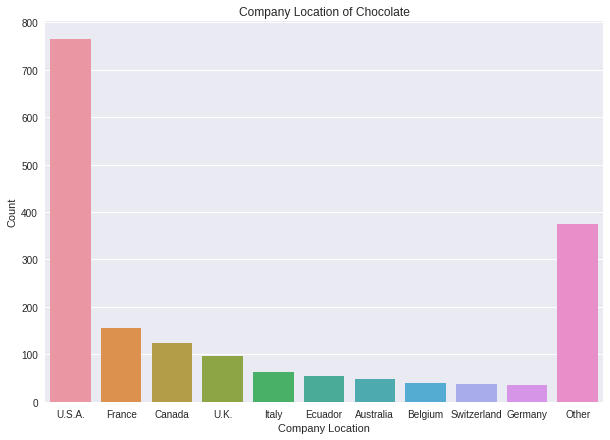

In [31]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.barplot(x=locCounts.index, y=locCounts.values)
plt.title('Company Location of Chocolate')
plt.ylabel('Count')
plt.xlabel('Company Location')
plt.show()

Despite that most companies are location in the U.S. the chocolates with companies which have the highest chocolate mean rating are located in Chile, Amsterdam, Netherlands, Philippines, Iceland, etc.

In [37]:
chocolate.groupby(['companyLocation']).mean().sort_values('rating', ascending=False).head(10)

,cocoaPercent,rating,cocoaRange,meanRating
companyLocation,,,,
Chile,70.000000,3.750000,70.000000,3.241838
Amsterdam,73.250000,3.500000,72.500000,3.189928
Netherlands,70.000000,3.500000,70.000000,3.241838
Philippines,65.000000,3.500000,60.000000,3.139303
Iceland,68.666667,3.416667,70.000000,3.241838
Vietnam,74.545455,3.409091,73.636364,3.166332
Brazil,69.823529,3.397059,67.058824,3.135590
Poland,71.875000,3.375000,71.250000,3.215883
Australia,70.224490,3.357143,69.591837,3.218662


## Chocolate Origin Comparison

In [32]:
chocolate.broadOrigin.value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: broadOrigin, dtype: int64

In [33]:
originCounts = chocolate.broadOrigin.value_counts()
other = originCounts[35:].sum()
originCounts= originCounts[:35]
originCounts.loc[36] = other
originCounts.rename(index = {36:'Other'}, inplace=True)
originCounts.head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: broadOrigin, dtype: int64

The plot below shows the origin of the chocolate bars. Some of the top origin countries include Venezula, Ecuador, Peru, Madagascar, and the Dominican Republic.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


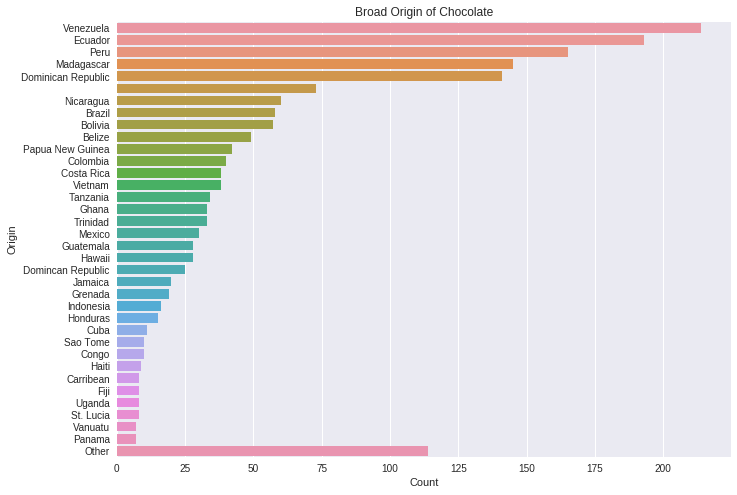

In [34]:
plt.figure(figsize = (11, 8))
sns.barplot(y=originCounts.index, x=originCounts.values)
plt.title('Broad Origin of Chocolate')
plt.ylabel('Origin')
plt.xlabel('Count')
plt.show()

Below are the chocolate origins with the highest mean ratings.  Origins of Venezula, Dominican Republic, Ecuador, and Madagascar have highest mean ratings.

In [35]:
chocolate.groupby(['broadOrigin']).mean().sort_values('rating', ascending=False).head(10)

,cocoaPercent,rating,cocoaRange,meanRating
broadOrigin,,,,
"Ven, Bolivia, D.R.",70.0,4.00,70.0,3.241838
"Dom. Rep., Madagascar",70.0,4.00,70.0,3.241838
"Guat., D.R., Peru, Mad., PNG",88.0,4.00,90.0,2.945652
"Venezuela, Java",70.0,4.00,70.0,3.241838
"Gre., PNG, Haw., Haiti, Mad",70.0,4.00,70.0,3.241838
"Peru, Dom. Rep",67.0,4.00,70.0,3.241838
"Dominican Rep., Bali",70.0,3.75,70.0,3.241838
"Ven.,Ecu.,Peru,Nic.",75.0,3.75,70.0,3.241838
"Peru, Belize",75.0,3.75,70.0,3.241838


### Two-Tailed T-test

The two-tailed t-test shows that chocolate ratings for Venezuela are significantly different (about 3.89 standard errors) from the chocolate ratings of Ecuador with over a 99% confidence. 

In [51]:
venezuela = chocolate.loc[lambda chocolate: chocolate.broadOrigin == 'Venezuela', :]
ecuador = chocolate.loc[lambda chocolate: chocolate.broadOrigin == 'Ecuador', :]

np.random.seed(0)
sampleA = np.random.choice(venezuela.rating, 170, replace = True)
sampleB = np.random.choice(ecuador.rating, 170, replace = True)

print(ttest_ind(sampleA, sampleB, equal_var=False))

Ttest_indResult(statistic=3.8992079686831214, pvalue=0.00011775674582345035)


In [53]:
print(np.mean(sampleA))
print(np.mean(sampleB))


3.3397058823529413
3.135294117647059


## Future Research

For future research it will be interesting to explore how the ratings vary with additional data on each individual chocolate bar.  For example, if we had multiple ratings for the same chocolate bar, and from mutiple batches, it would be interesting to see the variance between these.  Also, with data science techniques, such as regression, we would be able to see the exact correlation between variables such as cocoa percentage and rating.  Machine learning may enable us to determine the rating for chocolate bar using factors included in the data such as cocoa percentage, broad origin, and bean type.